In [9]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
from IPython.display import clear_output, display, Math, Latex
from atlas_ml import *

In [94]:
dataset = pd.read_csv('Datasets/Classification/Titanic/train.csv')
dataset = dataset.fillna(0)
data = dataset.values.T
Pass_id = data[0]
Y = one_hot(np.expand_dims(data[1],0),2)
Pclass = data[2]
Sex = [1*int(i=='male') for i in data[4] ]
Age = data[5]
SibSp = data[6]
Parch = data[7]
#Ticket = [i]  -> probably irrelevant or redundant with class, fare etc
Fare = data[9]
#Cabin = [int(i[])] -> too many Nan
Embarked = [1*int(i=='S')+2*int(i=='C')+3*int(i=='Q') for i in data[11]]

In [186]:
# degree of polynomial features
d = 1

In [187]:
X = np.vstack([normalize(i) for i in [Pclass,Sex,Age,SibSp,Parch,Fare,Embarked]])
size = X.shape[1]
X_train = X[:,:int(size*0.9)].astype('Float64')
Y_train = Y[:,:int(size*0.9)].astype('Float64')
PX_train = (polynom_features(X_train,d))
X_val = X[:,int(size*0.9):].astype('Float64')
Y_val = Y[:,int(size*0.9):].astype('Float64')
PX_val = (polynom_features(X_val,d))


/home/agopal/anaconda3/envs/onlinepub/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/agopal/anaconda3/envs/onlinepub/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  after removing the cwd from sys.path.
/home/agopal/anaconda3/envs/onlinepub/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/home/agopal/anaconda3/envs/onlinepub/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  import sys


In [188]:
n_in = np.shape(PX_train)[0]
n_out = np.shape(Y_train)[0]
log_reg = Logistic(n_in,n_out,CE_loss)

In [189]:
n_epochs = 15
lr = 0.01
lr_decay = 1
batch_size = 32
beta = 0.1

#regularization parameter labmda
reg_lamda = 0

epoch:15/15 | Loss:0.1802 | Train Accuracy: 0.8065 | Test_Accuracy:0.8222


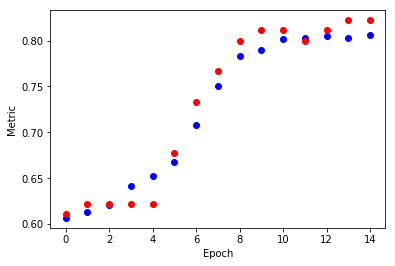

In [190]:
train(log_reg, PX_train, Y_train, PX_val, Y_val, model_accuracy, n_epochs, batch_size, lr, lr_decay, beta, reg_lamda)

In [49]:
dataset = pd.read_csv('Datasets/Classification/Titanic/test.csv')
dataset = dataset.fillna(0)
data = dataset.values.T
Pass_id = data[0]
Pclass = data[1]
Sex = [1*int(i=='male') for i in data[3] ]
Age = data[4]
SibSp = data[5]
Parch = data[6]
#Ticket = [i]  -> probably irrelevant or redundant with class, fare etc
Fare = data[8]
#Cabin = [int(i[])] -> too many Nan
Embarked = [1*int(i=='S')+2*int(i=='C')+3*int(i=='Q') for i in data[10]]

In [51]:
X_test = np.vstack([normalize(i) for i in [Pclass,Sex,Age,SibSp,Parch,Fare,Embarked]]).astype('Float64')
PX_test = polynom_features(X_test,d)
H = inv_one_hot(log_reg.f_pass(PX_test))

/home/agopal/anaconda3/envs/onlinepub/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.


In [ ]:
submission = pd.DataFrame({'PassengerId':Pass_id.flatten(),'Survived':H.flatten().astype('int')})

In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
X_test = np.vstack([normalize(i) for i in [Pclass,Sex,Age,SibSp,Parch,Fare,Embarked]]).astype('Float64')
H2 = inv_one_hot(titanic_net.f_pass(X_test))